# **Task D1**
## Analyzing YouTube Video Data from News Publishers

##### This task focuses on analyzing YouTube videos about a news topic (e.g., Covid-19) published by at least 4 English news publishers (e.g., BBC, Fox News, ...) from a start date to an end date. You will need to specify the news topic and the list of keywords to search for the videos about that topic on YouTube. Also, you will need to extract the channel IDs of the news publishers using the function get_channel_info() given to you in the attached "collect.ipynb" file. All settings need to be specified in Section B (Settings) of "collect.ipynb" and also copied into Section B (Settings) of this jupyter notebook (D1.ipynb). Please note the terms "News Publisher" and "Channel" have been used interchangeably in this task (each news publisher has a channel - if a news publisher has more than one channels on YouTube, pick any and state that in your TaskCompletionReport). The following instructions convey important information about the task. Please **read them carefully** and complete the task. If you need any clarification please    
<img src="youtube.png" alt="SIT112 Avocado!" width="1800" height="200">

### A. Instructions
#### Attachments
* directions.pdf
* collect.ipynb
* credentials-sample.ini
* video-presentation-guideline.pdf

#### Get Started 
1. Rename the "credentials-sample.ini" file to "credentials.ini" and follow the instructions. 
2. Creat your YouTube API key and assign it to developer_key in the credentials.ini file. You will need the YouTube API key to get access to the YouTube API (collect the data). See the following video: https://youtu.be/N18czV5tj5o (the video is not up to date; the instrucitons might be sighly different. You can view the following link for more details: https://developers.google.com/youtube/v3/getting-started). Please note Projects that enable the YouTube Data API have a default quota allocation of 10,000 units per day; to make an efficient use of your quota, please avoid multiple excecutions of the "collect.ipynb" file: https://developers.google.com/youtube/v3/guides/quota_and_compliance_audits. 
3. To work with the YouTube API (send queries), you need to install Google API Python Client using: "conda install google-api-python-client" 
#### Specify the news topic and news publishers (channels)
4. Choose a news topic (e.g., Covid-19) and a list of keywords to be used for finding videos about that topic. You can extract the keywords by looking at some sample video titles. 
5. Choose at least 4 popular English news publishers (e.g., BBC, Fox News).
6. Extract, manually, the video IDs of sample videos from different  news publishers (channels). You can do so by clicking on the share button for each video. 
7. Extract the Channel IDs of the videos using the get_channel_info() function in collect.ipynb 
#### Collect the Videos and Comments using "collect.ipynb" 
8. Specify the Channel IDs and names in the Settings section of the attached "collect.ipynb" file (CHANNELS = {...})
9. Specify the list keywords in the Settings section of the attached collect.ipynb file (KEYWORDS = [...])
10. Specify the START_DATE and END_DATE in the Settings section of the attached collect.ipynb file
11. Specify the MAX_VIDEOS such that you can extract **at least 20 videos per news publisher (channel)**. Make sure for your specified topic, **at least 300 comments per news publisher (channel)** can be collected. Please note some publishers might have disabled comments.
12. Please **do not make any changes to the "collect.ipynb" file**
13. Execute the collect.ipynb file to collect the videos (will be stored in videos.csv) and the comments on those videos (will be stored in comments.csv).
#### Complete the Task
14. <font color='red'> Choose only 2 quesitons from Section E1 and only 1 quesiton from Section E2 </font> and answer them based on the hints. Please note, for each question, you must **briefly discuss your observations** based on the results.
15. Please note **there is no unique solution** for most questions; if you need to make any assumptions, **state your assumptions** in the comments and in your TaskCompletionReport and answer the question accordingly. Please also note, **if something has not been clearly stated in a question (e.g., the type of visualization, etc) it means you are allowed to make your own choice**. 
16. **Read the attached "video-presentation-guideline.pdf"** carefully and record a video clip (based on video-presentation-guideline.pdf) that presents your completed task. Upload the video on a video repository such as YouTube (or any other preferred repository) and provide the link in the TaskCompletionReport. 
17. Complete the TaskCompletionReport form.

#### Submit the Task
18. Please make sure you have copied the settings from collect.ipynb into your solution file (D1.ipynb), under section B (settings).  
19. Please make sure you have executed and saved all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
20. Please make sure you have included the link to the video recording of your presentation in your TaskCompletionReport. 
21. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution file (D1.ipynb) as an "ipynb" file (do not zip/combine them). Please do not include "collect.ipynb" in your submission. 

Good luck :)

### B. Settings
Copy your settings from Section B of the "collect.ipynb" file below. 

In [49]:
VIDEOS_FILE = "videos.csv"
COMMENTS_FILE = "comments.csv"
CREDENTIALS_FILE = 'credentials.ini'
START_DATE = datetime(2022, 1, 1)
END_DATE = datetime(2024, 4, 1)
KEYWORDS =['coronavirus', 'covid', 'covid-19', 'pandemic']
# You can use functin get_channel_info() to extract the channel ID of a sample video from a news publisher ...
CHANNELS = {
    'UCXIJgqnII2ZOINSWNOGFThA' : 'Fox News',
    'UC16niRr50-MSBwiO3YDb3RA' : 'BBC News',
    'UCupvZG-5ko_eiXAupbDfxWw' : 'CNN',
    'UCaXkIU1QidjPwiAYu6GcHjg' : 'MSNBC'
}
MAX_VIDEOS = 50 # the maximum number of video that should be returned for each request. Acceptable values are 0 to 50
QUERY= f"intitle:{','.join(KEYWORDS)}"

In [19]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install google-api-python-client
!pip install nltk
!pip install langdetect
!pip install textblob
!pip install tabulate
!pip install prettytable

### C. Imports
You need to import the following libraries. Install the libraries using "conda install ... or pip install ..." if they have not been installed on your machine. For example you can install google api python client by executing "conda install google-api-python-client"

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from datetime import datetime
import os
from configparser import ConfigParser
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from langdetect import detect
import langdetect
from textblob import TextBlob
import calendar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from prettytable import PrettyTable
from tabulate import tabulate
import numpy as np
from collections import defaultdict
import warnings
import pandas.core.common 
# Ignore the warning
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakshambehal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### D. Clean and Prepare the Data

##### D.1. Write Python code that cleans the data for analyzing the videos and comments.

In [59]:
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Remove rows with missing values
videos_df.dropna(subset=['video_id', 'video_title'], inplace=True)
comments_df.fillna('', inplace=True)

# Text cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text.lower()  # Convert to lowercase

# Clean video titles and comments
videos_df['cleaned_title'] = videos_df['video_title'].apply(clean_text)
comments_df['cleaned_comment'] = comments_df['comment_text'].apply(clean_text)

# Language filtering function
stop_words = set(stopwords.words('english'))

def filter_by_language(text):
    try:
        lang = detect(text)
        return lang == 'en'  # Filter for English comments
    except:
        return False

# Filter comments by language and remove stopwords
comments_df = comments_df[comments_df['cleaned_comment'].apply(filter_by_language)]
comments_df['cleaned_comment'] = comments_df['cleaned_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Remove duplicate videos based on video_id
videos_df.drop_duplicates(subset='video_id', keep='first', inplace=True)

print("Cleaned Videos Data:")
print(videos_df.head())

print("\nCleaned Comments Data:")
print(comments_df.head())

# Save cleaned data to new CSV files (optional)
videos_df.to_csv('cleaned_videos.csv', index=False)
comments_df.to_csv('cleaned_comments.csv', index=False)


Cleaned Videos Data:
      video_id                channel_id  \
0  d1eEWihvwpQ  UCXIJgqnII2ZOINSWNOGFThA   
1  lydWQoqDNp8  UCXIJgqnII2ZOINSWNOGFThA   
2  2j3YtPVBT30  UCXIJgqnII2ZOINSWNOGFThA   
3  jXHikITwlng  UCXIJgqnII2ZOINSWNOGFThA   
4  ACLU0OxWisE  UCXIJgqnII2ZOINSWNOGFThA   

                                         video_title channel_title  \
0       who declares coronavirus outbreak a pandemic      Fox News   
1         tucker coronavirus pandemic is a real fear      Fox News   
2  ny gov cuomo talks rent payments coronavirus c...      Fox News   
3  bill gates on his  virus warning efforts to fi...      Fox News   
4   ingraham coronavirus pandemic spreads through us      Fox News   

     category_name live_upcoming_none  view_count  like_count  dislike_count  \
0  News & Politics               none      457017        3626              0   
1  News & Politics               none      459459        9068              0   
2  News & Politics               none       84916    

##### D.2. Write Python code that prepares the data for analyzing the videos and comments.

In [67]:
# A sample code for data preparation has been given below. Feel free to edit when needed

# Load the videos and comments dataframes from their respective CSV files
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Convert the published_at column to a datetime object for videos_df
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
videos_df['published_at_week'] = videos_df['published_at'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
videos_df['published_at_month'] = videos_df['published_at'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
videos_df['published_at_year'] = videos_df['published_at'].dt.strftime('%Y')

# Convert the published_at column to a datetime object for comments_df
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
comments_df['comment_date_week'] = comments_df['comment_date'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
comments_df['comment_date_month'] = comments_df['comment_date'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
comments_df['comment_date_year'] = comments_df['comment_date'].dt.strftime('%Y')

# Convert the duration column to seconds for videos_df
videos_df['duration'] = videos_df['duration'].apply(lambda x: re.findall(r'PT(\d+)M(\d+)S', x))
videos_df['duration'] = videos_df['duration'].apply(lambda x: int(x[0][0]) * 60 + int(x[0][1]) if len(x) > 0 else 0)

# Prepared DataFrame objects; can be used for data analysis
videos = videos_df.copy(deep=True)
comments = comments_df.copy(deep=True)
videos_comments_inner = pd.merge(videos,comments, on='video_id', how = 'inner') # merged videos and comments
videos_comments_left = pd.merge(videos,comments, on='video_id', how = 'left') # left-merged videos and comments

### E. Analyze the Videos and Comments

Please note you must **discuss your observations** for each question, in addition to the python code. 

#### E.1. Analyze the Videos and Comments - Part 1
* Choose **(only) 2** of the following questions (E.1.1 to E.1.7) and write Python code to answer them. 

##### E.1.2. What is the total number of views, likes, and comments for the videos published by different news publishers (channels)? Use visualization to compare these totals across the channels; discuss your observations. Your visualization should include three subplots, one for each variable (total number of views, total number of likes, and total number of comments). Additionally, your visualization should have appropriate labels for the x and y axes, as well as a title for each subplot.

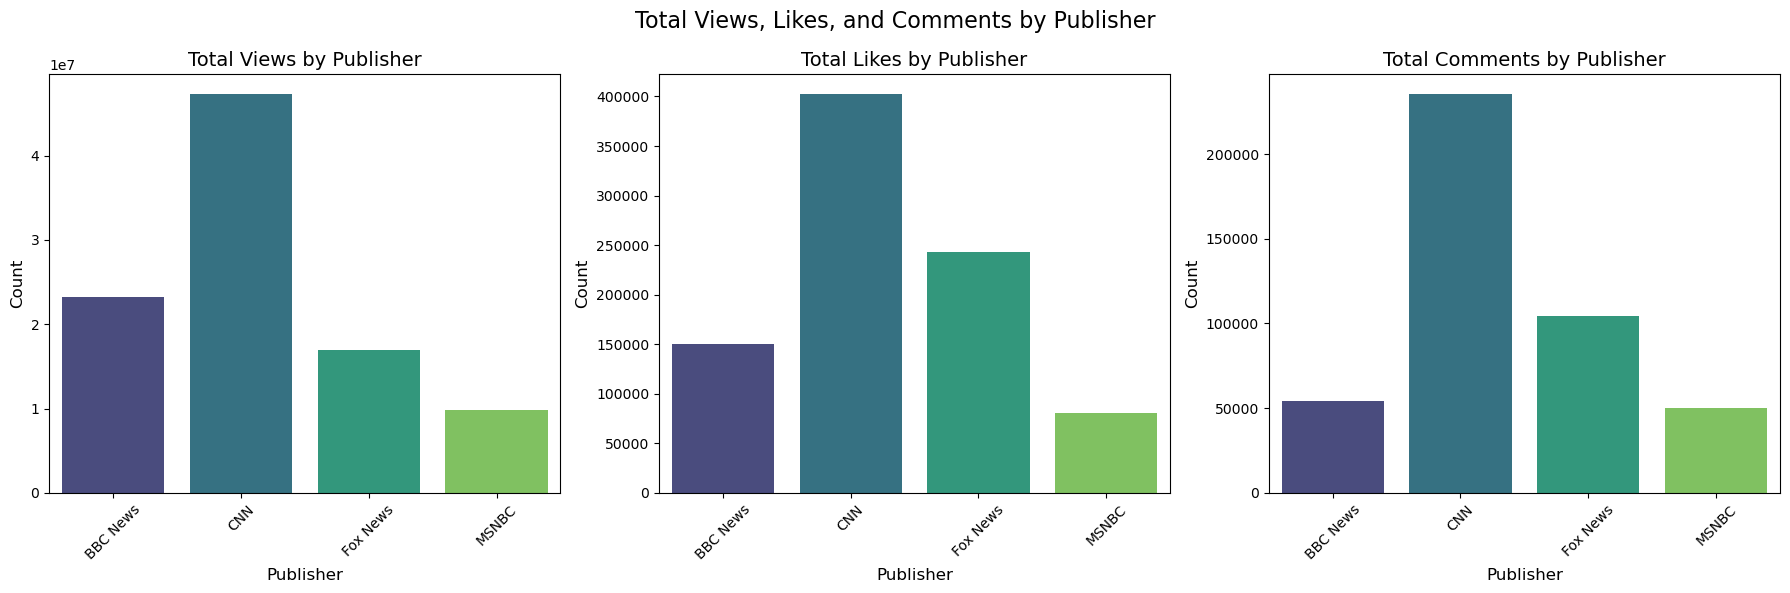

In [71]:
videos_df = pd.read_csv('cleaned_videos.csv')

# Calculate total views, likes, and comments by publisher
totals_by_publisher = videos_df.groupby('channel_title').agg({
    'view_count': 'sum',
    'like_count': 'sum',
    'comment_count': 'sum'
}).reset_index()

# Create subplots (1x3 grid)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot total number of views, likes, and comments by publisher
variables = ['view_count', 'like_count', 'comment_count']
titles = ['Total Views by Publisher', 'Total Likes by Publisher', 'Total Comments by Publisher']

for i, var in enumerate(variables):
    sns.barplot(x='channel_title', y=var, data=totals_by_publisher, ax=axes[i], palette='viridis')
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('Publisher', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Customize and display the plot
plt.suptitle('Total Views, Likes, and Comments by Publisher', fontsize=16)
plt.tight_layout()
plt.show()


##### E.1.3. How has the number of comments changed over time? Use visualization to answer this question and annotate at least three major events related to Covid-19 (e.g., WHO declares pandemic) on your plot. Additionally, analyze the plot and try to identify any relationship between these events and the changes in the number of comments; discuss your observations.

In [463]:
comments_df = pd.read_csv('cleaned_comments.csv')

print (comments_df.columns)
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'])

print (comments_by_date.columns)
print (monthly_std.columns)

Index(['video_id', 'comment_id', 'comment_text', 'comment_author',
       'comment_date', 'comment_like_count', 'parent_comment_id',
       'cleaned_comment'],
      dtype='object')
Index(['comment_date', 'num_comments'], dtype='object')
Index(['num_comments'], dtype='object')


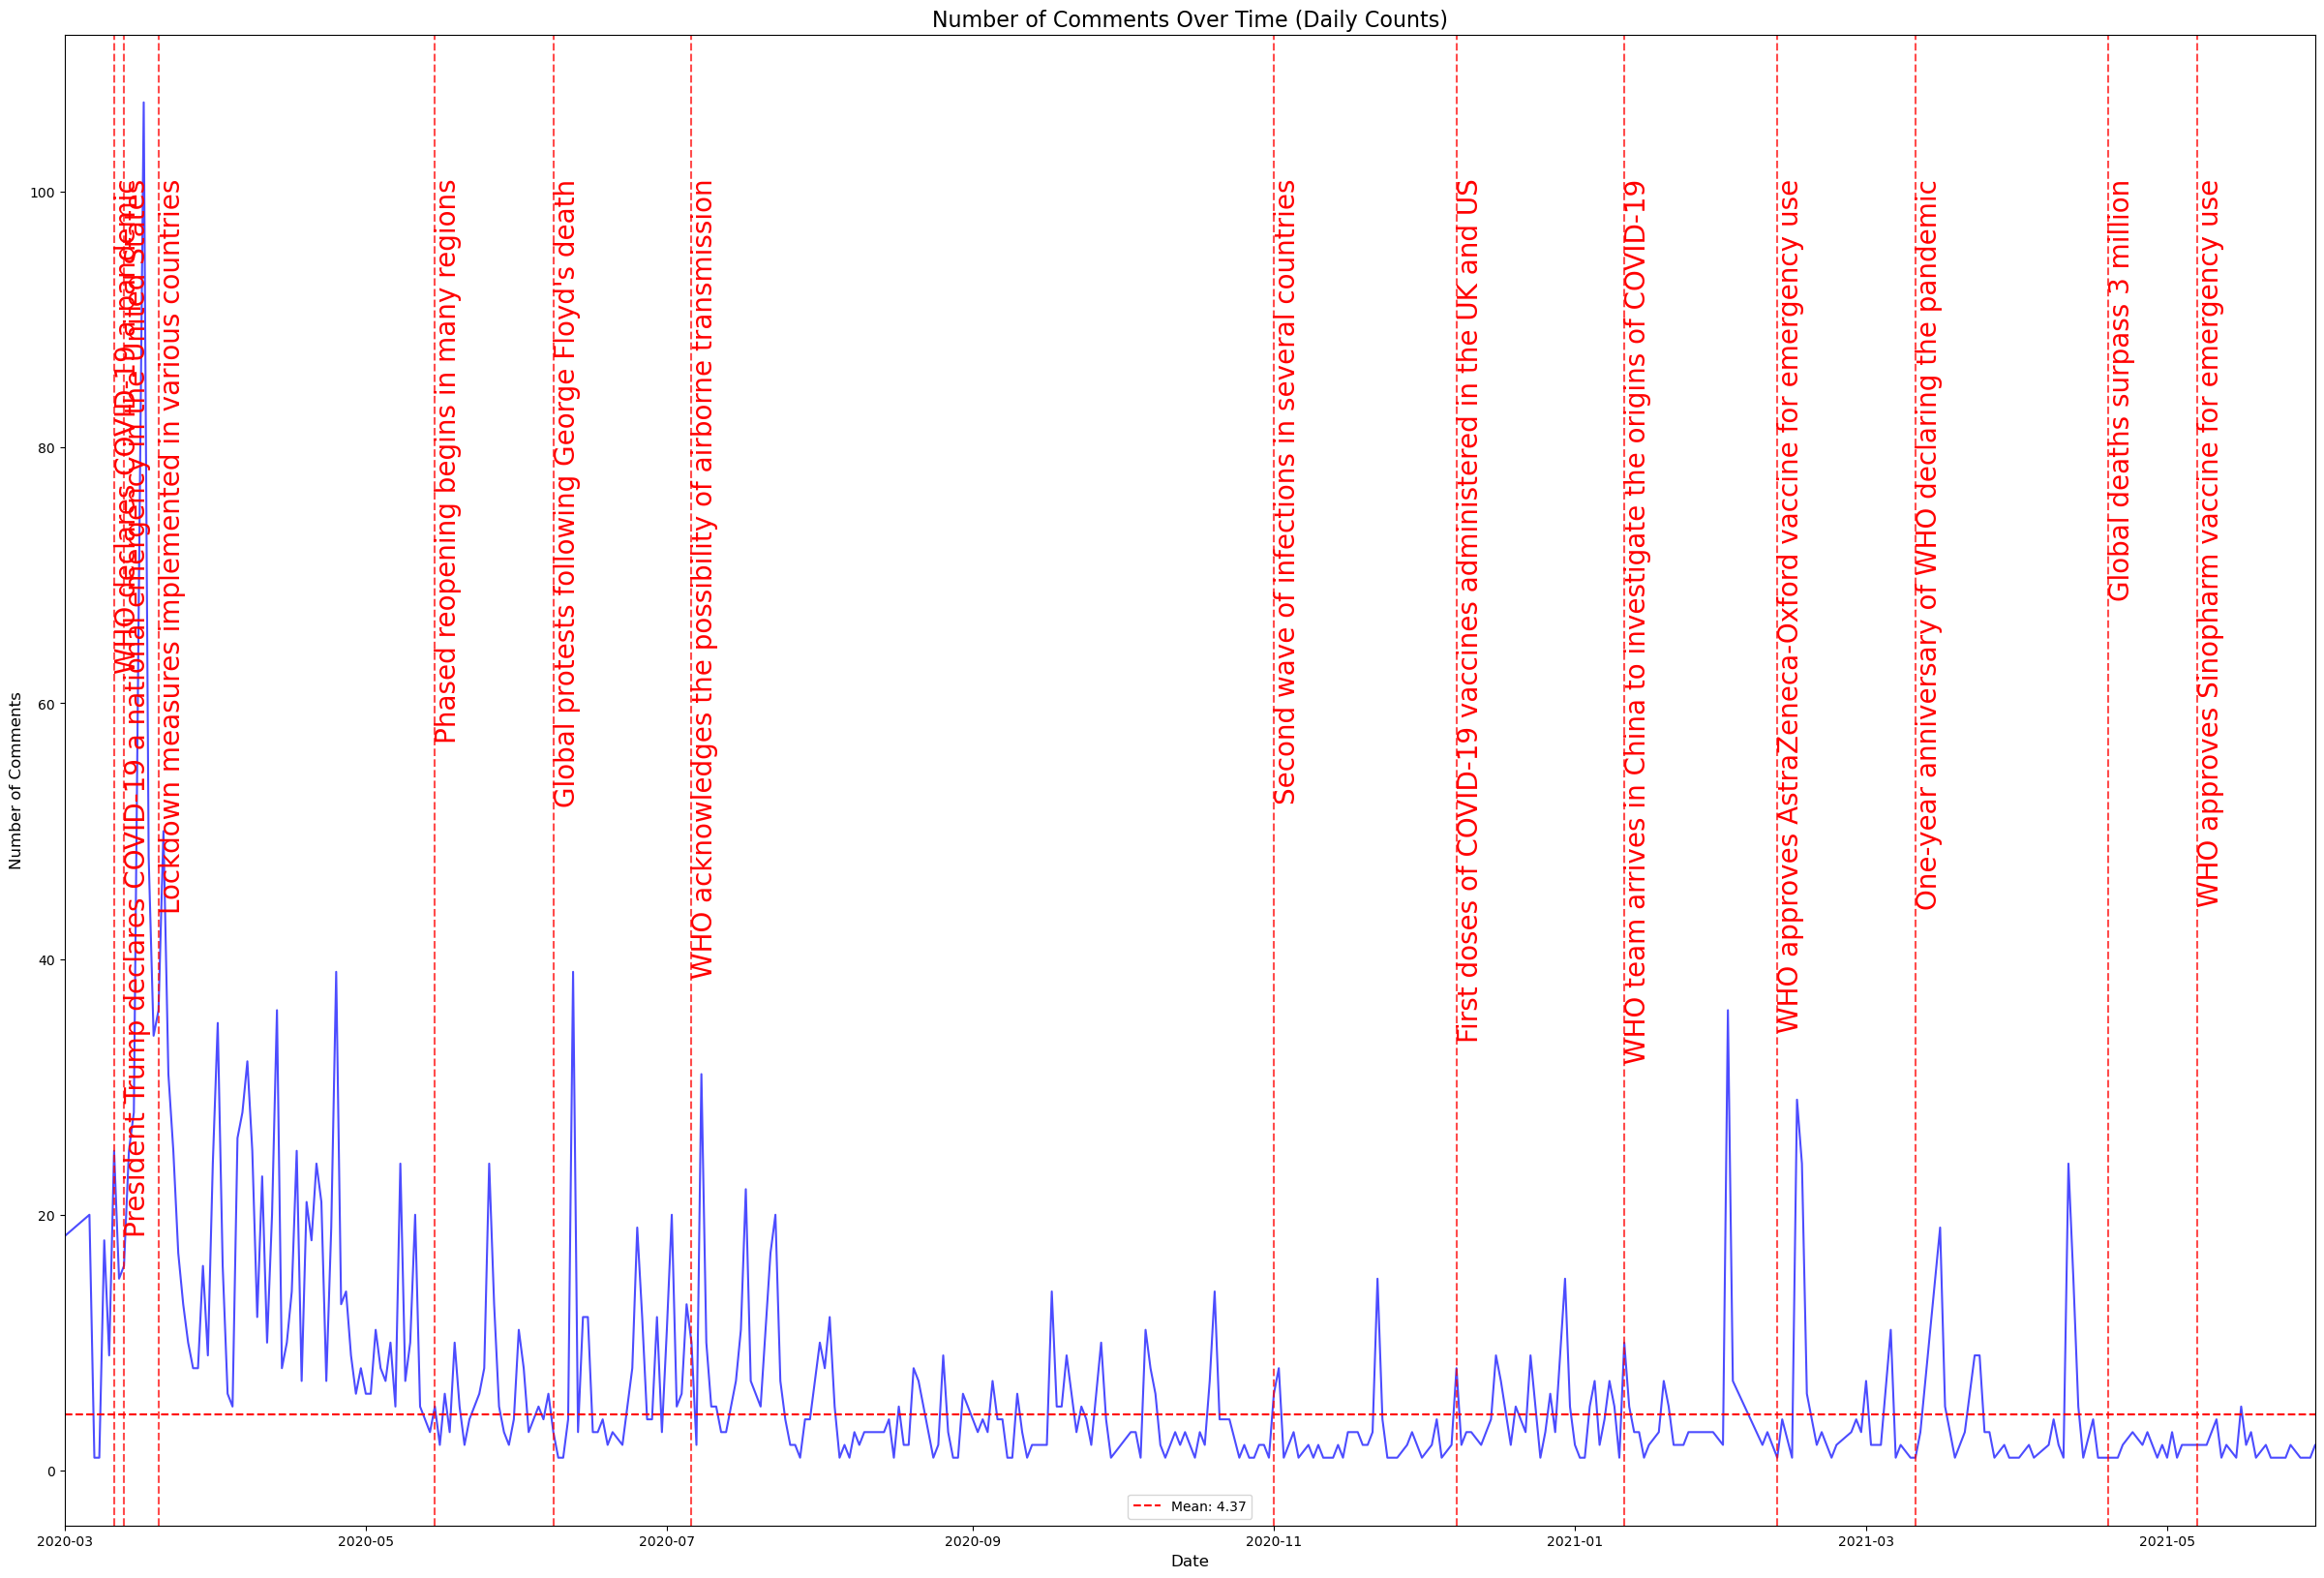

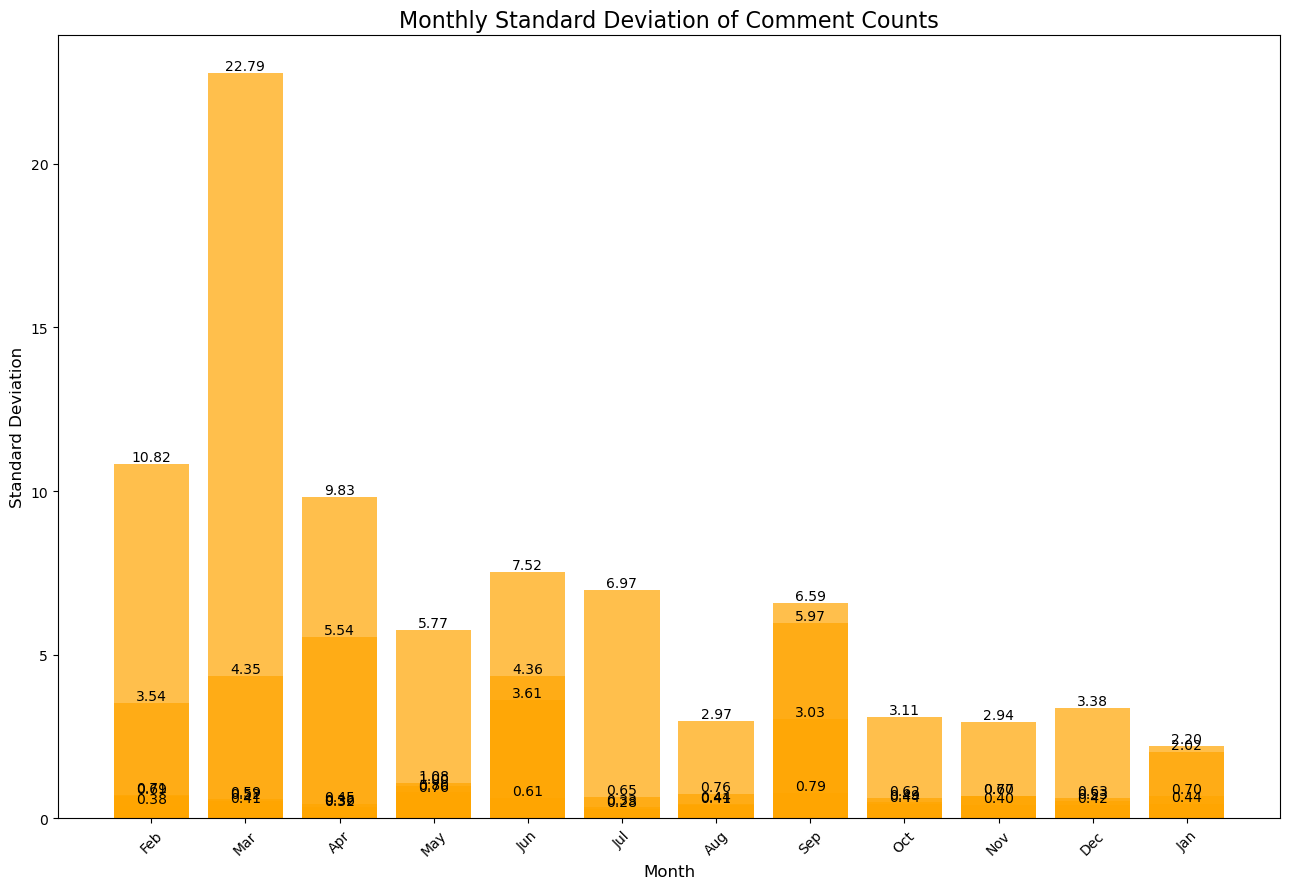

In [471]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned comments data (assuming 'cleaned_comments.csv' exists)
comments_df = pd.read_csv('cleaned_comments.csv')

# Convert comment_date to datetime format
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'])

# Aggregate comments by date (daily counts)
comments_by_date = comments_df.groupby(comments_df['comment_date'].dt.date).size().reset_index(name='num_comments')

# Ensure comment_date is in datetime format before using to_period
comments_by_date['comment_date'] = pd.to_datetime(comments_by_date['comment_date'])

# Calculate standard deviation of comment counts by month
monthly_std = comments_by_date.groupby(comments_by_date['comment_date'].dt.to_period('M'))['num_comments'].std()

# Convert the index of monthly_std to a DatetimeIndex for date formatting
monthly_std.index = monthly_std.index.to_timestamp()

# Calculate mean number of comments
mean_comments = comments_by_date['num_comments'].mean()


# Plot number of comments over time (daily counts)
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(comments_by_date['comment_date'], comments_by_date['num_comments'], color='blue', alpha=0.7)
ax.set_title('Number of Comments Over Time (Daily Counts)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Comments', fontsize=12)

# Add mean value annotation
ax.axhline(mean_comments, color='red', linestyle='--', label=f'Mean: {mean_comments:.2f}')
ax.legend()

# Set x-axis limits to focus on a specific timeframe
ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2021-05-31'))



# Add vertical lines or shaded regions to indicate COVID-19 events
covid_events = [

    ('2020-03-11', 'WHO declares COVID-19 a pandemic'),
    ('2020-03-13', 'President Trump declares COVID-19 a national emergency in the United States'),
    ('2020-03-20', 'Lockdown measures implemented in various countries'),
    ('2020-05-15', 'Phased reopening begins in many regions'),
    ('2020-06-08', 'Global protests following George Floyd\'s death'),
    ('2020-07-06', 'WHO acknowledges the possibility of airborne transmission'),
    ('2020-11-01', 'Second wave of infections in several countries'),
    ('2020-12-08', 'First doses of COVID-19 vaccines administered in the UK and US'),
    ('2021-01-11', 'WHO team arrives in China to investigate the origins of COVID-19'),
    ('2021-02-11', 'WHO approves AstraZeneca-Oxford vaccine for emergency use'),
    ('2021-03-11', 'One-year anniversary of WHO declaring the pandemic'),
    ('2021-04-19', 'Global deaths surpass 3 million'),
    ('2021-05-07', 'WHO approves Sinopharm vaccine for emergency use')
]

for date, label in covid_events:
    ax.axvline(pd.Timestamp(date), color='red', linestyle='--', alpha=0.7)
    ax.text(pd.Timestamp(date), ax.get_ylim()[1]*0.9, label, rotation=90, va='top', fontsize=20,color='red')



# Plot monthly standard deviation of comment counts (bar chart)
plt.figure(figsize=(13, 9))

# Convert PeriodIndex to month abbreviations (e.g., 'Jan', 'Feb', etc.)
month_labels = monthly_std.index.strftime('%b')

# Plot the bar chart using month abbreviations for the x-axis
bars = plt.bar(month_labels, monthly_std.values, color='orange', alpha=0.7)
plt.title('Monthly Standard Deviation of Comment Counts', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add annotations for standard deviation values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### E.2. Analyze the Videos and Comments - Part 2
* Choose **(only) 1** of the following questions (E.2.1 to E.2.7) and write Python code to answer them. 

##### E.2.2. How does the average length of the comments (in characters) on a video vary with its duration? Analyze this for different news publishers (channels) using visualizations and discuss your observations.

In [108]:
print(videos_df['channel_title'].unique())


['Fox News' 'BBC News' 'CNN' 'MSNBC']


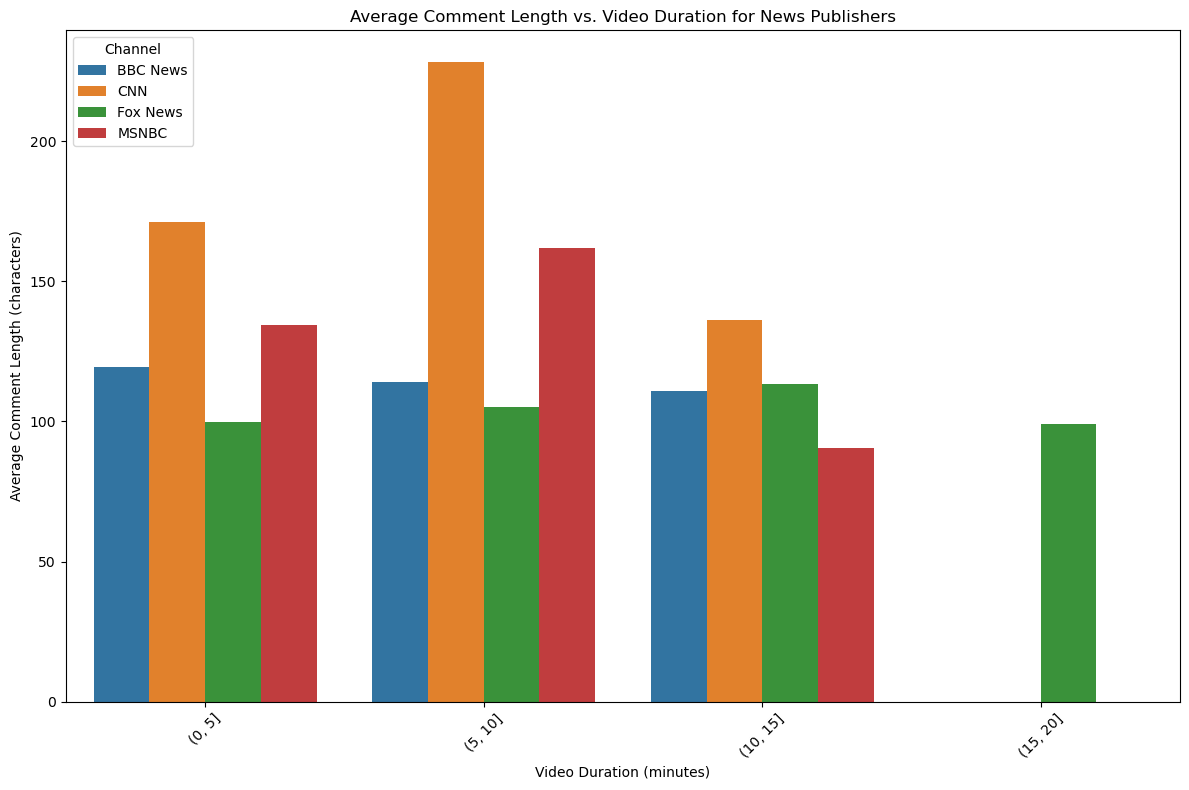

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load video and comments data
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Merge videos and comments data based on video_id to associate comments with videos
merged_df = pd.merge(comments_df, videos_df, on='video_id')

# Calculate comment length in characters
merged_df['comment_length'] = merged_df['comment_text'].apply(lambda x: len(str(x)))

# Convert duration from ISO 8601 format (e.g., PT2M34S) to numeric minutes
def convert_duration_to_minutes(duration):
    if pd.isna(duration) or not isinstance(duration, str):
        return None
    
    duration = duration.replace('PT', '')
    hours, minutes, seconds = 0, 0, 0
    
    if 'H' in duration:
        hours, duration = duration.split('H')
        hours = int(hours)
    
    if 'M' in duration:
        minutes, duration = duration.split('M')
        minutes = int(minutes)
    
    if 'S' in duration:
        seconds = int(duration.replace('S', ''))
    
    total_minutes = hours * 60 + minutes + seconds / 60
    return total_minutes

filtered_df['video_duration_minutes'] = filtered_df['duration'].apply(convert_duration_to_minutes)

# Define bins for video duration ranges
bins = np.arange(0, 21, 5)  # Duration bins from 0 to 20 minutes with 5-minute intervals

# Aggregate data by video duration range and calculate mean comment length
agg_df = filtered_df.groupby([pd.cut(filtered_df['video_duration_minutes'], bins), 'channel_title'])['comment_length'].mean().reset_index()

# Plot average comment length for each video duration range and news publisher
plt.figure(figsize=(12, 8))
sns.barplot(x='video_duration_minutes', y='comment_length', hue='channel_title', data=agg_df)
plt.xlabel('Video Duration (minutes)')
plt.ylabel('Average Comment Length (characters)')
plt.title('Average Comment Length vs. Video Duration for News Publishers')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.tight_layout()
plt.show()



In [273]:
print(f" videos dataframe: {videos.dtypes} \n")
print(f" comments dataframe: {comments.dtypes} \n")
print(f"videos_comments dataframe: {pd.merge(videos,comments, how='inner', on ='video_id').dtypes} \n")

 videos dataframe: video_id                      object
channel_id                    object
video_title                   object
channel_title                 object
category_name                 object
live_upcoming_none            object
view_count                     int64
like_count                     int64
dislike_count                  int64
comment_count                  int64
published_at          datetime64[ns]
tags                          object
duration                       int64
definition                    object
caption                         bool
thumbnail                     object
url                           object
published_at_week             object
published_at_month            object
published_at_year             object
dtype: object 

 comments dataframe: video_id                      object
comment_id                    object
comment_text                  object
comment_author                object
comment_date          datetime64[ns]
comment_like_count 